In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

In [2]:
#Загрузка данных
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
x_train.shape

(404, 13)

In [4]:
x_test.shape

(102, 13)

In [5]:
#Нормализация данных
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

In [6]:
#Создаем сеть
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Обучаем сеть
history = model.fit(x_train, y_train, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 23ms/step - loss: 554.6434 - mae: 21.8136 - val_loss: 610.7926 - val_mae: 23.0185
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 530.9998 - mae: 21.2807 - val_loss: 586.8862 - val_mae: 22.5031
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 507.7863 - mae: 20.7494 - val_loss: 562.9799 - val_mae: 21.9742
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 484.0891 - mae: 20.1886 - val_loss: 537.7991 - val_mae: 21.4012
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 458.3064 - mae: 19.5797 - val_loss: 510.1410 - val_mae: 20.7601
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 430.8796 - mae: 18.9088 - val_loss: 480.6098 - val_mae: 20.0494
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 401.6153 - mae: 18.1595 - val_loss: 449.3141 - val_mae: 19.2614
Epoch 8/100
11/11 [=====================

In [9]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
95,13.455131,2.533772,17.867737,3.130894,95
96,13.218198,2.519633,17.668032,3.095742,96
97,13.112653,2.511486,17.410177,3.060920,97
98,13.016086,2.492742,17.276356,3.041364,98
99,12.847334,2.469260,17.210644,3.043084,99


In [25]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 600])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

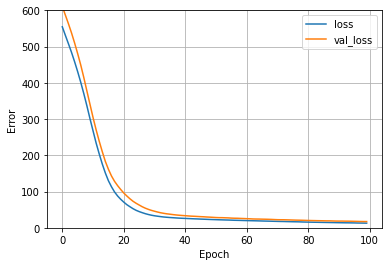

In [26]:
plot_loss(history)

In [12]:
#Оценка точности модели
mse, mae = model.evaluate(x_test, y_test, verbose=0)

In [13]:
print("Средняя абсолютная ошибка (тысяч долларов):", mae)

Средняя абсолютная ошибка (тысяч долларов): 3.363060474395752


In [14]:
#Предсказание
pred = model.predict(x_test)

In [15]:
print("Предсказанная стоимость:", pred[1][0], ", правильная стоимость:", y_test[1])

Предсказанная стоимость: 17.427612 , правильная стоимость: 18.8
